In [3]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
print("Setup completed")

Setup completed


In [4]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [5]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [6]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='../input/dogs-cats-images/dataset/training_set',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='../input/dogs-cats-images/dataset/test_set', target_size=(224,224))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
100/100 [==============================] - 27s 273ms/step - loss: 0.7840 - accuracy: 0.5119 - val_loss: 0.6943 - val_accuracy: 0.5031
Epoch 2/10
100/100 [==============================] - 27s 271ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6918 - val_accuracy: 0.5063
Epoch 3/10
100/100 [==============================] - 27s 271ms/step - loss: 0.6934 - accuracy: 0.4859 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 4/10
100/100 [==============================] - 27s 270ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6944 - val_accuracy: 0.4844
Epoch 5/10
100/100 [==============================] - 27s 269ms/step - loss: 0.6933 - accuracy: 0.4888 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 27s 271ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6933 - val_accuracy: 0.4781
Epoch 7/10
100/100 [==============================] - 27s 272ms/step - loss: 0.6933 - accuracy: 0.4731 - val_loss: 0.6932 - val_ac

KeyError: 'acc'

OSError: Unable to open file (unable to open file: name = 'vgg19', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

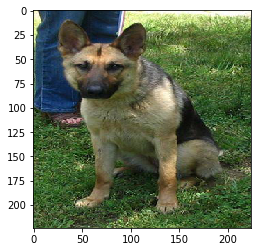

In [28]:
from keras.preprocessing import image
img = image.load_img("../input/dogpic/dog.19.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")  #unsolved problem
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [20]:
import os
print(os.listdir('../input/dogpic'))

['dog.19.jpg']
